# Modélisation

### Import des modules

In [1]:
import importlib
import sys, os
import warnings

from sklearn.exceptions import UndefinedMetricWarning

sys.path.append(os.path.abspath(".."))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import utils.scoring as scoring_mod

from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline

importlib.reload(scoring_mod)

from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline


warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

from sklearn.model_selection import StratifiedKFold

results = []

import joblib


### Encodage / Validation des donneés

In [2]:

df = joblib.load("df.joblib")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 131 entries, SK_ID_CURR to PAYMENT_RATE
dtypes: category(1), float64(59), int64(55), object(16)
memory usage: 305.3+ MB


In [3]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

cat_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'CNT_CHILDREN_BIN'
]

num_cols = [
    'SK_ID_CURR',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'TOTALAREA_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'nb_loans',
    'sum_debt',
    'AGE',
    ## Features Engineering
    'CHILDREN_RATIO',
    'INCOME_PER_PERSON',
    'AGE_PER_MEMBER',
    'DAYS_EMPLOYED_PERC',
    'INCOME_CREDIT_PERC',
    'ANNUITY_INCOME_PERC',
    'PAYMENT_RATE'
]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'CNT_CHILDREN_BIN'],
      dtype='object')


In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(list(num_cols))


['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ENTRANCES_MODE', 'FLOORSM

In [5]:
# Drop la target a_quitte_l_entreprise
X = df.drop(columns=["TARGET"])

# Valeurs de la target
y = df.loc[X.index, "TARGET"]

X.isna().sum().sum()


np.int64(0)

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,  stratify=y     
)

### Dummy Classifier

In [7]:

from joblib import dump


model = DummyClassifier(strategy='most_frequent')

pipe = SkPipeline([
    ('preprocessing', preprocessor),
    ('classifier', model)
])


pipe.fit(X_train, y_train)

metrics = scoring_mod.score_classification("DummyClassifier", pipe, X, y)

flat = {
    "train_accuracy":  metrics["Train"]["Accuracy"],
    "train_precision": metrics["Train"]["Precision"],
    "train_recall":    metrics["Train"]["Recall"],
    "train_f1":        metrics["Train"]["F1"],
    "train_roc_auc":   metrics["Train"]["ROC-AUC"],
    "train_pr_auc":    metrics["Train"]["PR-AUC"],

    "test_accuracy":   metrics["Test"]["Accuracy"],
    "test_precision":  metrics["Test"]["Precision"],
    "test_recall":     metrics["Test"]["Recall"],
    "test_f1":         metrics["Test"]["F1"],
    "test_roc_auc":    metrics["Test"]["ROC-AUC"],
    "test_pr_auc":     metrics["Test"]["PR-AUC"],

    "fit_time_ms":     metrics["Times (ms)"]["Train"],
    "score_time_ms":   metrics["Times (ms)"]["Predict"],
}

results.append(metrics)
dump(pipe, "../artifacts/dummy.joblib")



📊 Model: DummyClassifier
→ Accuracy      | Train: 0.919 | Test: 0.919
→ Precision     | Train: 0.000 | Test: 0.000
→ Recall        | Train: 0.000 | Test: 0.000
→ F1-score      | Train: 0.000 | Test: 0.000
→ ROC-AUC-score | Train: 0.500 | Test: 0.500
→ PR-AUC-score  | Train: 0.081 | Test: 0.081
→ Train Time: 1816.83 ms
→ Predict Time: 341.70 ms


['../artifacts/dummy.joblib']

### Logistic Regression

In [8]:
pipe_lr_vanilla = SkPipeline([
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression(random_state=42, max_iter=2000, 
    class_weight='balanced' )) 
])

pipe_lr_vanilla.fit(X_train, y_train)

metrics =     scoring_mod.score_classification("LogisticRegression (no SMOTE)", pipe_lr_vanilla, X, y)

flat = {
    "train_accuracy":  metrics["Train"]["Accuracy"],
    "train_precision": metrics["Train"]["Precision"],
    "train_recall":    metrics["Train"]["Recall"],
    "train_f1":        metrics["Train"]["F1"],
    "train_roc_auc":   metrics["Train"]["ROC-AUC"],
    "train_pr_auc":    metrics["Train"]["PR-AUC"],

    "test_accuracy":   metrics["Test"]["Accuracy"],
    "test_precision":  metrics["Test"]["Precision"],
    "test_recall":     metrics["Test"]["Recall"],
    "test_f1":         metrics["Test"]["F1"],
    "test_roc_auc":    metrics["Test"]["ROC-AUC"],
    "test_pr_auc":     metrics["Test"]["PR-AUC"],

    "fit_time_ms":     metrics["Times (ms)"]["Train"],
    "score_time_ms":   metrics["Times (ms)"]["Predict"],
}

results.append(metrics)

dump(pipe_lr_vanilla, "../artifacts/best_model.joblib")

📊 Model: LogisticRegression (no SMOTE)
→ Accuracy      | Train: 0.690 | Test: 0.689
→ Precision     | Train: 0.162 | Test: 0.161
→ Recall        | Train: 0.682 | Test: 0.679
→ F1-score      | Train: 0.262 | Test: 0.260
→ ROC-AUC-score | Train: 0.686 | Test: 0.684
→ PR-AUC-score  | Train: 0.136 | Test: 0.135
→ Train Time: 19280.09 ms
→ Predict Time: 415.87 ms


['../artifacts/best_model.joblib']

seuil*: 0.518 | coût*: 33083.00


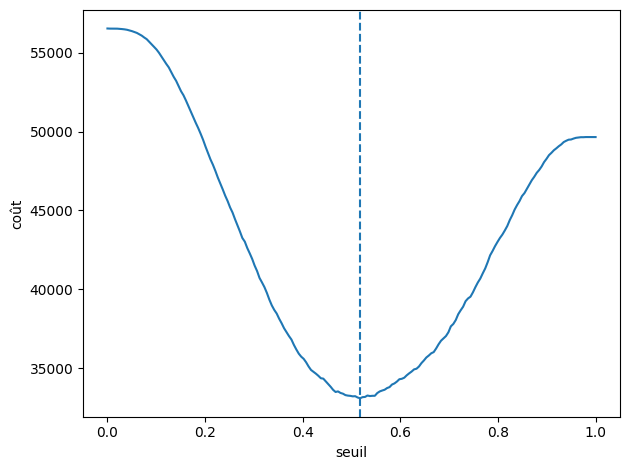

In [9]:

from sklearn.metrics import confusion_matrix

# coût métier (FN = mauvais client accepté, FP = bon client refusé)
cout_fn = 10.0   # faux négatif = perte plus grave
cout_fp = 1.0    # faux positif = manque à gagner

proba = pipe_lr_vanilla.predict_proba(X_test)[:, 1]

seuils = np.linspace(0, 1, 200)
couts = []
# Calcul pour les seuils de 0 à 1
# Calcul fp*cout_fp + fn*cout_fn

for s in seuils:
    yhat = (proba >= s).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    couts.append(fp*cout_fp + fn*cout_fn)

i = int(np.argmin(couts))
s_opt, c_opt = float(seuils[i]), float(couts[i])
print(f"seuil*: {s_opt:.3f} | coût*: {c_opt:.2f}")

plt.plot(seuils, couts)
plt.axvline(s_opt, ls="--")
plt.xlabel("seuil"); plt.ylabel("coût")
plt.tight_layout(); plt.show()



### Light gbm

In [10]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline as SkPipeline


pipe_lgbm_vanilla = SkPipeline([
    ('preprocessing', preprocessor),
    ('clf', LGBMClassifier(
        objective='binary',
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=10,
        subsample=0.8,
        colsample_bytree=0.5,
        n_jobs=-1,
        random_state=42,
        class_weight='balanced',         
    ))
])



pipe_lgbm_vanilla.fit(X_train, y_train)

metrics = scoring_mod.score_classification("LightGBM (no smote)", pipe_lgbm_vanilla, X, y)

flat = {
    "train_accuracy":  metrics["Train"]["Accuracy"],
    "train_precision": metrics["Train"]["Precision"],
    "train_recall":    metrics["Train"]["Recall"],
    "train_f1":        metrics["Train"]["F1"],
    "train_roc_auc":   metrics["Train"]["ROC-AUC"],
    "train_pr_auc":    metrics["Train"]["PR-AUC"],

    "test_accuracy":   metrics["Test"]["Accuracy"],
    "test_precision":  metrics["Test"]["Precision"],
    "test_recall":     metrics["Test"]["Recall"],
    "test_f1":         metrics["Test"]["F1"],
    "test_roc_auc":    metrics["Test"]["ROC-AUC"],
    "test_pr_auc":     metrics["Test"]["PR-AUC"],

    "fit_time_ms":     metrics["Times (ms)"]["Train"],
    "score_time_ms":   metrics["Times (ms)"]["Predict"],
}

results.append(metrics)

dump(pipe_lgbm_vanilla, "../artifacts/lgbm_vanilla.joblib")

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8901
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 204
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8900
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 205
[LightGBM] [

/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8906
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 205
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.200182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8867
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 204
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8902
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 205
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8905
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 205
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📊 Model: LightGBM (no smote)
→ Accuracy      | Train: 0.707 | Test: 0.705
→ Precision     | Train: 0.175 | Test: 0.171
→ Recall        | Train: 0.707 | Test: 0.691
→ F1-score      | Train: 0.281 | Test: 0.274
→ ROC-AUC-score | Train: 0.707 | Test: 0.698
→ PR-AUC-score  | Train: 0.148 | Test: 0.143
→ Train Time: 18294.01 ms
→ Predict Time: 516.68 ms


['../artifacts/lgbm_vanilla.joblib']

/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


seuil*: 0.543 | coût*: 31775.00


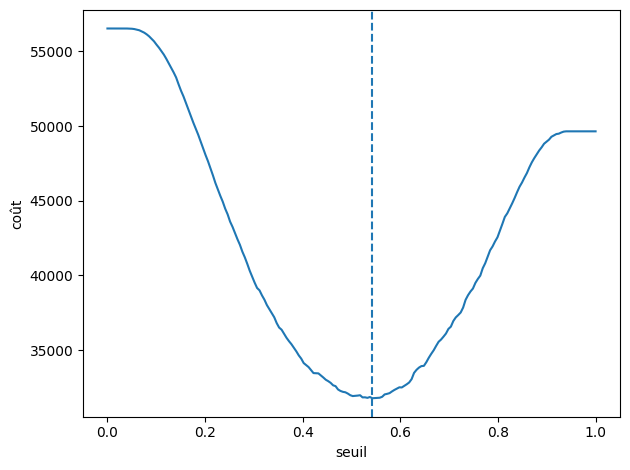

In [11]:

from sklearn.metrics import confusion_matrix

# coût métier (FN = mauvais client accepté, FP = bon client refusé)
cout_fn = 10.0   # faux négatif = perte plus grave
cout_fp = 1.0    # faux positif = manque à gagner

proba = pipe_lgbm_vanilla.predict_proba(X_test)[:, 1]

seuils = np.linspace(0, 1, 200)
couts = []
# Calcul pour les seuils de 0 à 1
# Calcul fp*cout_fp + fn*cout_fn

for s in seuils:
    yhat = (proba >= s).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    couts.append(fp*cout_fp + fn*cout_fn)

i = int(np.argmin(couts))
s_opt, c_opt = float(seuils[i]), float(couts[i])
print(f"seuil*: {s_opt:.3f} | coût*: {c_opt:.2f}")

plt.plot(seuils, couts)
plt.axvline(s_opt, ls="--")
plt.xlabel("seuil"); plt.ylabel("coût")
plt.tight_layout(); plt.show()



### Optimisation

In [12]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from mlflow.models import infer_signature
import mlflow, mlflow.sklearn

mlflow.autolog(disable=True)
mlflow.sklearn.autolog(disable=True) 

pipe_lr_smote = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy=0.75)),
    ('clf', LogisticRegression(random_state=42, max_iter=2000))
])

with mlflow.start_run(run_name="logistic_regression_smote"):
    mlflow.set_tags({"stage":"logistic_regression", "model_family":"logistic", "strategy":"smote"})

    pipe_lr_smote.fit(X_train, y_train.to_numpy().ravel())

    metrics = scoring_mod.score_classification("LogisticRegression (SMOTE)", pipe_lr_smote, X, y)

    flat = {
        "train_accuracy":  metrics["Train"]["Accuracy"],
        "train_precision": metrics["Train"]["Precision"],
        "train_recall":    metrics["Train"]["Recall"],
        "train_f1":        metrics["Train"]["F1"],
        "train_roc_auc":   metrics["Train"]["ROC-AUC"],
        "train_pr_auc":    metrics["Train"]["PR-AUC"],
        "test_accuracy":   metrics["Test"]["Accuracy"],
        "test_precision":  metrics["Test"]["Precision"],
        "test_recall":     metrics["Test"]["Recall"],
        "test_f1":         metrics["Test"]["F1"],
        "test_roc_auc":    metrics["Test"]["ROC-AUC"],
        "test_pr_auc":     metrics["Test"]["PR-AUC"],
        "fit_time_ms":     metrics["Times (ms)"]["Train"],
        "score_time_ms":   metrics["Times (ms)"]["Predict"],
    }
    mlflow.log_metrics(flat)
    results.append(metrics)

/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


📊 Model: LogisticRegression (SMOTE)
→ Accuracy      | Train: 0.764 | Test: 0.763
→ Precision     | Train: 0.185 | Test: 0.183
→ Recall        | Train: 0.564 | Test: 0.560
→ F1-score      | Train: 0.278 | Test: 0.276
→ ROC-AUC-score | Train: 0.673 | Test: 0.671
→ PR-AUC-score  | Train: 0.139 | Test: 0.138
→ Train Time: 36641.62 ms
→ Predict Time: 443.85 ms


seuil*: 0.457 | coût*: 33486.00


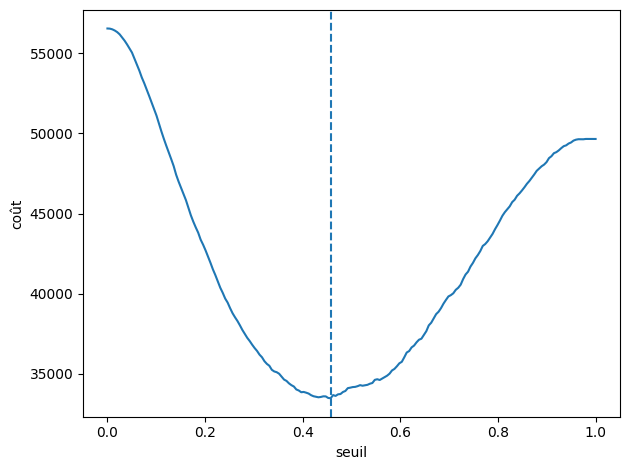

In [13]:

from sklearn.metrics import confusion_matrix

# coût métier (FN = mauvais client accepté, FP = bon client refusé)
cout_fn = 10.0   # faux négatif = perte plus grave
cout_fp = 1.0    # faux positif = manque à gagner

proba = pipe_lr_smote.predict_proba(X_test)[:, 1]

seuils = np.linspace(0, 1, 200)
couts = []
# Calcul pour les seuils de 0 à 1
# Calcul fp*cout_fp + fn*cout_fn

for s in seuils:
    yhat = (proba >= s).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    couts.append(fp*cout_fp + fn*cout_fn)

i = int(np.argmin(couts))
s_opt, c_opt = float(seuils[i]), float(couts[i])
print(f"seuil*: {s_opt:.3f} | coût*: {c_opt:.2f}")

plt.plot(seuils, couts)
plt.axvline(s_opt, ls="--")
plt.xlabel("seuil"); plt.ylabel("coût")
plt.tight_layout(); plt.show()



In [14]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform, uniform
from joblib import Memory
import tempfile, numpy as np
import mlflow, mlflow.sklearn

cache = Memory(location=tempfile.mkdtemp(), verbose=0) 
pipe_lgbm_smote = ImbPipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", LGBMClassifier(
            objective="binary",
            boosting_type="gbdt",
            n_estimators=600,
            learning_rate=0.05,
            n_jobs=-1,
            random_state=42
        ))
    ],
    memory=cache
)

param_dist = {
    "clf__num_leaves":      [15, 31, 63],
    "clf__max_depth":       [-1, 6, 10],
    "clf__learning_rate":   [0.03, 0.05, 0.1],
    "clf__n_estimators":    [300, 600, 1000],     
    "smote__sampling_strategy": [0.6, 0.8, 1.0],
    "smote__k_neighbors":       [3, 5],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe_lgbm_smote,
    param_distributions=param_dist,
    n_iter=40,                       
    scoring="roc_auc",
    refit=True,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=False
)

with mlflow.start_run(run_name="lgbm_smote_randomsearch"):
    mlflow.set_tags({"stage":"train", "model_family":"lgbm", "strategy":"SMOTE+RandomizedSearch"})
    mlflow.sklearn.autolog(log_models=True)

    search.fit(X_train, y_train)

    best_model  = search.best_estimator_
    best_params = search.best_params_
    best_cv     = search.best_score_

    mlflow.log_params({f"best__{k}": v for k, v in best_params.items()})
    mlflow.log_metric("cv_best_pr_auc", best_cv)

    metrics = scoring_mod.score_classification("LightGBM (SMOTE)", best_model, X, y)
    flat = {
        "train_accuracy":  metrics["Train"]["Accuracy"],
        "train_precision": metrics["Train"]["Precision"],
        "train_recall":    metrics["Train"]["Recall"],
        "train_f1":        metrics["Train"]["F1"],
        "train_roc_auc":   metrics["Train"]["ROC-AUC"],
        "train_pr_auc":    metrics["Train"]["PR-AUC"],
        "test_accuracy":   metrics["Test"]["Accuracy"],
        "test_precision":  metrics["Test"]["Precision"],
        "test_recall":     metrics["Test"]["Recall"],
        "test_f1":         metrics["Test"]["F1"],
        "test_roc_auc":    metrics["Test"]["ROC-AUC"],
        "test_pr_auc":     metrics["Test"]["PR-AUC"],
        "fit_time_ms":     metrics["Times (ms)"]["Train"],
        "score_time_ms":   metrics["Times (ms)"]["Predict"],
    }
    mlflow.log_metrics(flat)
    results.append(metrics)

print("Best params:", best_params)
print("Best CV PR-AUC:", best_cv)


2025/11/10 11:49:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/joblib/memory.py:607: UserWarning: Persisting input arguments took 1.09s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  return self._cached_call(args, kwargs, shelving=False)[0]
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/joblib/memory.py:607: UserWarning: Persisting input arguments took 0.90s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  return self._cached_call(args, kwargs, shelving=False)[0]
/home/marin/IA/MLOPS2-banque/.venv/lib/python3.12/site-packages/joblib/memory.py:607: UserWarning: Persisting input arguments took 0.86s to run.If this happens often in your code, it can cause performance p

[LightGBM] [Info] Number of positive: 120612, number of negative: 150765
[LightGBM] [Info] Number of positive: 90459, number of negative: 150765
[LightGBM] [Info] Number of positive: 90459, number of negative: 150765
[LightGBM] [Info] Number of positive: 90459, number of negative: 150766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.347777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41295
[LightGBM] [Info] Number of data points in the train set: 241224, number of used features: 206
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.694249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42154
[LightGBM] [Info] Number

KeyboardInterrupt: 

In [ ]:

from sklearn.metrics import confusion_matrix

# coût métier (FN = mauvais client accepté, FP = bon client refusé)
cout_fn = 10.0   # faux négatif = perte plus grave
cout_fp = 1.0    # faux positif = manque à gagner

proba = pipe_lgbm_smote   .predict_proba(X_test)[:, 1]

seuils = np.linspace(0, 1, 200)
couts = []
# Calcul pour les seuils de 0 à 1
# Calcul fp*cout_fp + fn*cout_fn

for s in seuils:
    yhat = (proba >= s).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    couts.append(fp*cout_fp + fn*cout_fn)

i = int(np.argmin(couts))
s_opt, c_opt = float(seuils[i]), float(couts[i])
print(f"seuil*: {s_opt:.3f} | coût*: {c_opt:.2f}")

plt.plot(seuils, couts)
plt.axvline(s_opt, ls="--")
plt.xlabel("seuil"); plt.ylabel("coût")
plt.tight_layout(); plt.show()



In [ ]:
df_results = pd.DataFrame(results)
df_results

,Model,Train,Test,Times (ms)
0,DummyClassifier,"{'Accuracy': 0.919, 'Precision': 0.0, 'Recall'...","{'Accuracy': 0.919, 'Precision': 0.0, 'Recall'...","{'Train': 1655.68, 'Predict': 326.82}"
1,LogisticRegression (no SMOTE),"{'Accuracy': 0.689, 'Precision': 0.161, 'Recal...","{'Accuracy': 0.688, 'Precision': 0.161, 'Recal...","{'Train': 32276.74, 'Predict': 435.19}"
2,LightGBM (vanilla),"{'Accuracy': 0.702, 'Precision': 0.171, 'Recal...","{'Accuracy': 0.699, 'Precision': 0.167, 'Recal...","{'Train': 7437.0, 'Predict': 452.85}"
3,LogisticRegression (SMOTE),"{'Accuracy': 0.763, 'Precision': 0.184, 'Recal...","{'Accuracy': 0.762, 'Precision': 0.183, 'Recal...","{'Train': 55021.76, 'Predict': 430.61}"


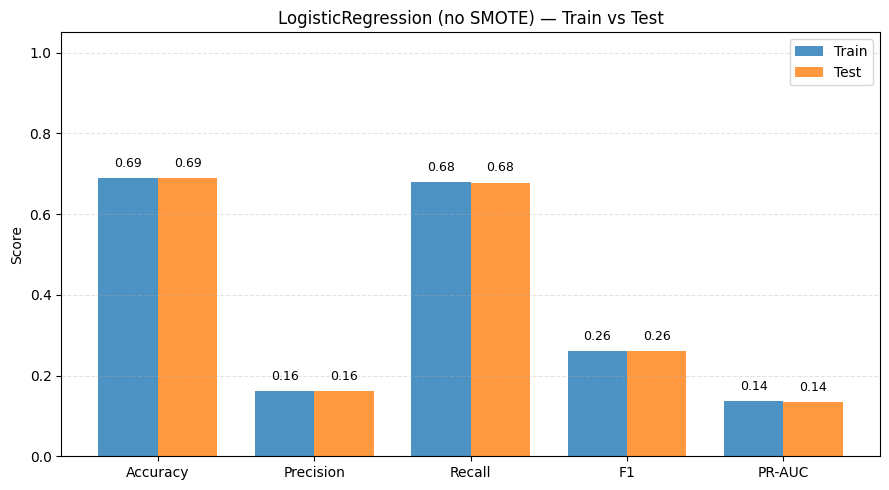

In [ ]:
model_name = "LogisticRegression (no SMOTE)"

row = df_results[df_results["Model"] == model_name].iloc[0]
train = pd.Series(row["Train"])
test  = pd.Series(row["Test"])

metrics = ["Accuracy", "Precision", "Recall", "F1", "PR-AUC"]
x = np.arange(len(metrics)); bar_width = 0.38

plt.figure(figsize=(9,5))
b_train = plt.bar(x - bar_width/2, train[metrics].values, width=bar_width, label="Train", alpha=0.8)
b_test  = plt.bar(x + bar_width/2, test[metrics].values,  width=bar_width, label="Test",  alpha=0.8)

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title(f"{model_name} — Train vs Test")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.35)

for b in list(b_train)+list(b_test):
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h+0.02, f"{h:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout(); plt.show()


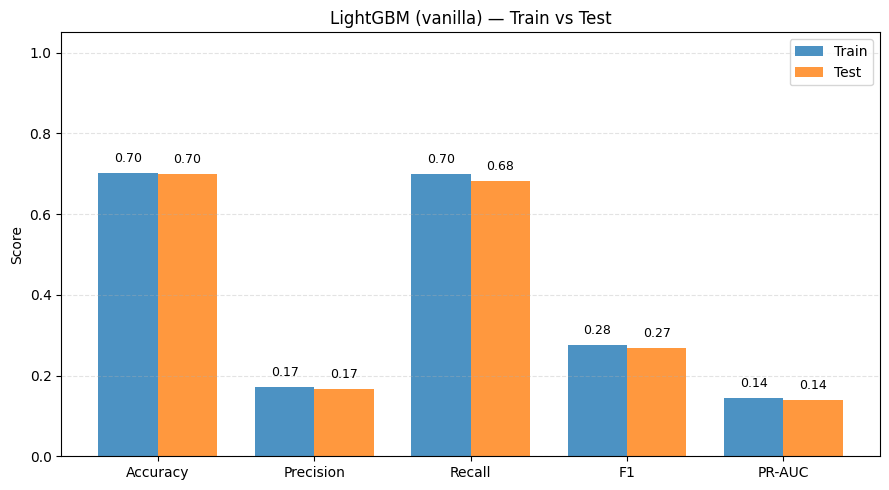

In [ ]:
model_name = "LightGBM (vanilla)"

row = df_results[df_results["Model"] == model_name].iloc[0]
train = pd.Series(row["Train"])
test  = pd.Series(row["Test"])

metrics = ["Accuracy", "Precision", "Recall", "F1", "PR-AUC"]
x = np.arange(len(metrics)); bar_width = 0.38

plt.figure(figsize=(9,5))
b_train = plt.bar(x - bar_width/2, train[metrics].values, width=bar_width, label="Train", alpha=0.8)
b_test  = plt.bar(x + bar_width/2, test[metrics].values,  width=bar_width, label="Test",  alpha=0.8)

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title(f"{model_name} — Train vs Test")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.35)

for b in list(b_train)+list(b_test):
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h+0.02, f"{h:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout(); plt.show()


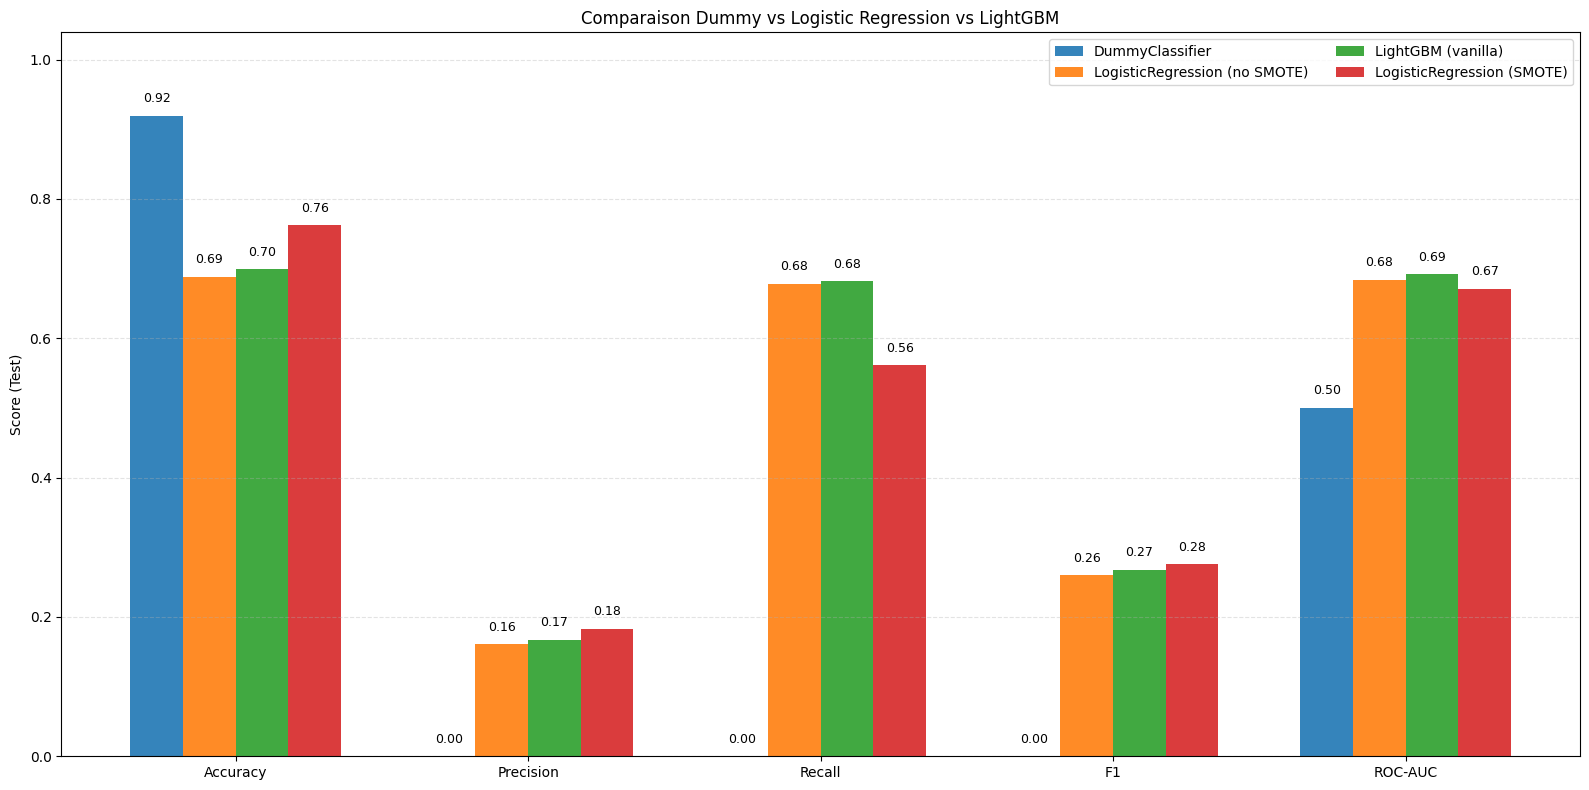

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----- Noms des modèles comme dans df_results -----
rf_name     = "LightGBM (vanilla)"
lr_name     = "LogisticRegression (no SMOTE)"
dummy_name  = "DummyClassifier"
lr_smote    = "LogisticRegression (SMOTE)"

models_order = [dummy_name, lr_name, rf_name, lr_smote]
metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]

df_comp = df_results[df_results["Model"].isin(models_order)].copy()
df_test = pd.concat([df_comp[["Model"]], df_comp["Test"].apply(pd.Series)], axis=1)

df_test["order"] = df_test["Model"].map({m:i for i,m in enumerate(models_order)})
df_test = (df_test
           .sort_values("order")
           .drop(columns="order")
           .set_index("Model")[metrics]
           .reindex(models_order)) 

df_test = df_test.astype(float)

x = np.arange(len(metrics))        
n_models = len(models_order)
bar_width = 0.18
offsets = (np.arange(n_models) - (n_models-1)/2) * bar_width 

fig, ax = plt.subplots(figsize=(16, 8))

bars_by_model = []
for i, model in enumerate(models_order):
    if model not in df_test.index:
        continue
    vals = df_test.loc[model, metrics].to_numpy(dtype=float)
    bars = ax.bar(x + offsets[i], np.nan_to_num(vals, nan=0.0),
                  width=bar_width, alpha=0.9, label=model)
    bars_by_model.append((bars, vals))

ax.set_xticks(x, metrics)
ax.set_ylabel("Score (Test)")
ax.set_title("Comparaison Dummy vs Logistic Regression vs LightGBM")
ax.grid(axis='y', linestyle='--', alpha=0.35)

ymax = np.nanmax(df_test.values) if np.isfinite(np.nanmax(df_test.values)) else 1.0
ax.set_ylim(0, min(1.05, ymax + 0.12)) 

ax.legend(ncols=2, frameon=True, fontsize=10)

def add_value_labels(ax, bars, values, fmt="{:.2f}"):
    for rect, v in zip(bars, values):
        if np.isnan(v):
            continue 
        h = rect.get_height()
        x = rect.get_x() + rect.get_width()/2
        if h > ax.get_ylim()[1] - 0.08:
            ax.text(x, h - 0.04, fmt.format(v), ha='center', va='top', fontsize=9, color="white")
        else:
            ax.text(x, h + 0.015, fmt.format(v), ha='center', va='bottom', fontsize=9)

for bars, vals in bars_by_model:
    add_value_labels(ax, bars, vals)

fig.tight_layout()
plt.show()


In [ ]:
import shap
import pandas as pd
import numpy as np

best_pipe = pipe_lr_vanilla
pre  = best_pipe.named_steps['preprocessing']
clf  = best_pipe.named_steps['clf']

Xtr = pre.transform(X_train)
Xte = pre.transform(X_test)
feat = pre.get_feature_names_out()

def to_df(X):
    return pd.DataFrame(X.toarray() if hasattr(X, "toarray") else X,
                        columns=feat)

Xtr_df, Xte_df = to_df(Xtr), to_df(Xte)

explainer = shap.LinearExplainer(clf, Xtr_df, link=shap.links.logit)
sv = explainer(Xte_df)   

mean_abs = pd.Series(
    np.abs(sv.values).mean(axis=0),
    index=feat
).sort_values(ascending=False)


shap.plots.bar(sv, max_display=20)      

shap.plots.beeswarm(sv, max_display=20)

proba = best_pipe.predict_proba(X_test)[:, 1] 

i = proba.argmax()

shap.plots.waterfall(sv[i], max_display=10)